In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 20)

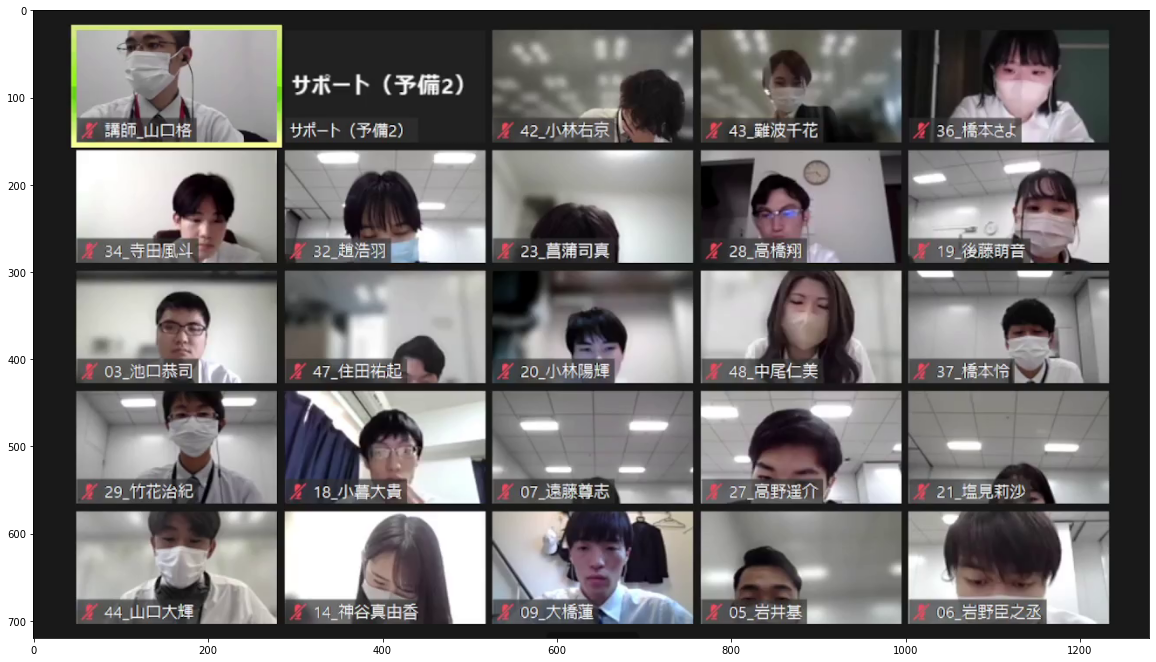

In [2]:
img = cv2.imread("./demo.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

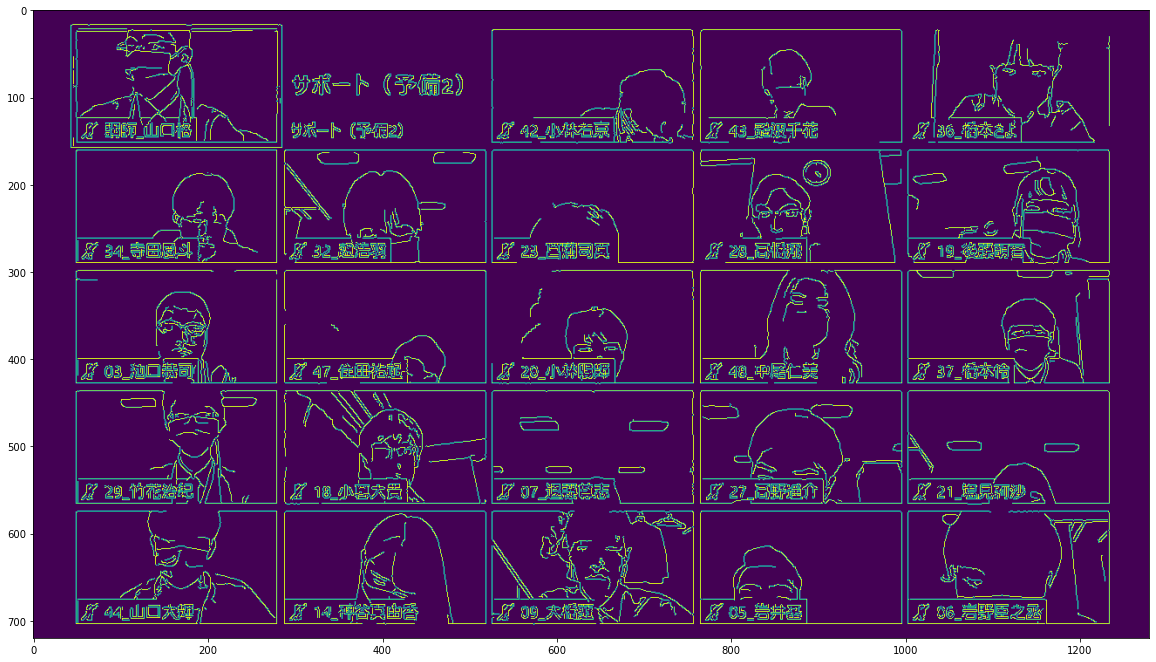

In [52]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny)

In [53]:
index = np.where(canny > 0)
y = index[0]
x = index[1]
x.min(), y.min()

(43, 16)

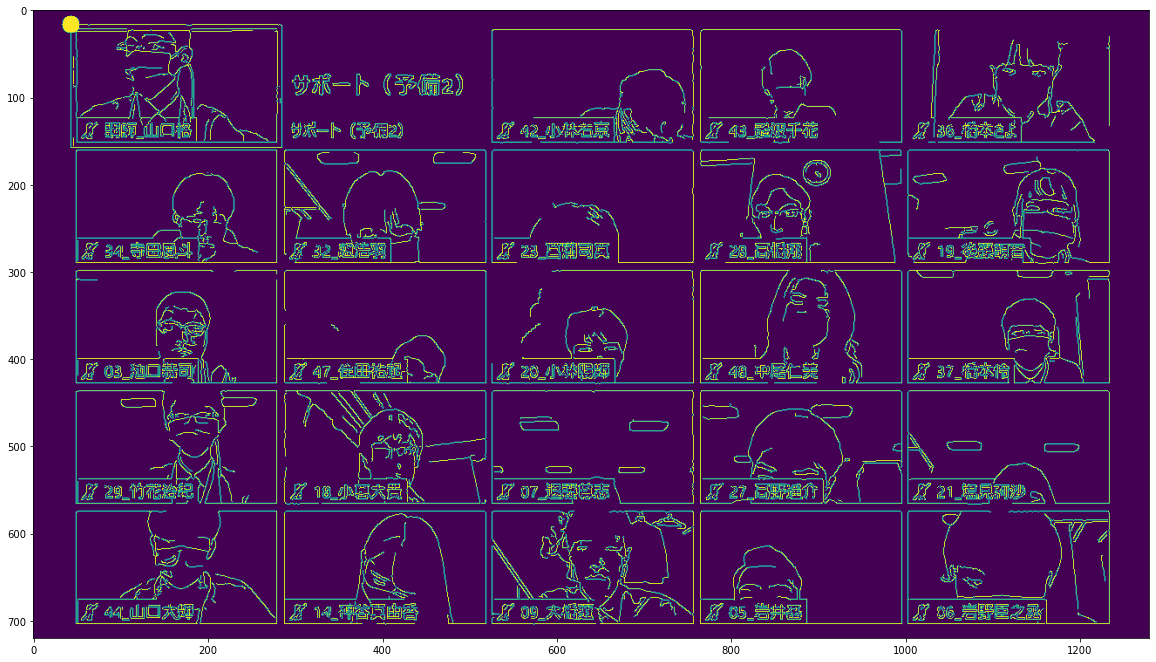

In [54]:
dot = cv2.circle(canny, (x.min(), y.min()), 10, (255, 0, 0), -1)
plt.imshow(dot)

In [60]:
width = np.where(canny[y.min(), :] > 0)[0].max() - x.min() 
height = np.where(canny[:, x.min()] > 0)[0].max() - y.min() 

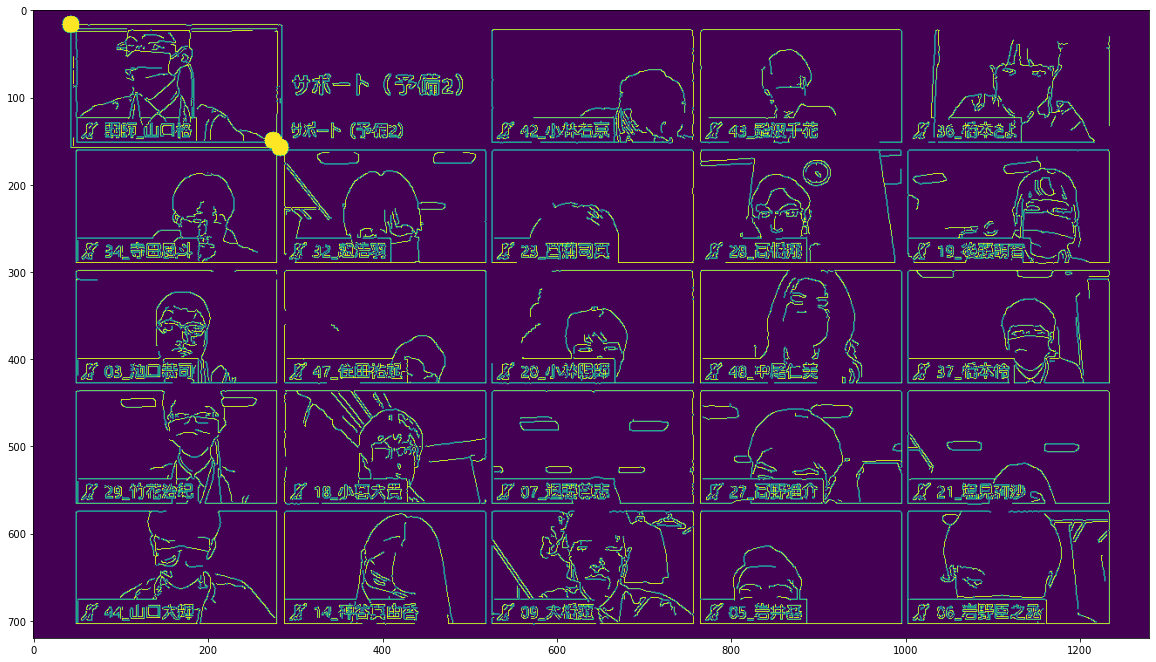

In [61]:
dot2 = cv2.circle(canny, (x.min()+width, y.min()+height), 10, (255, 0, 0), -1)
plt.imshow(dot2)

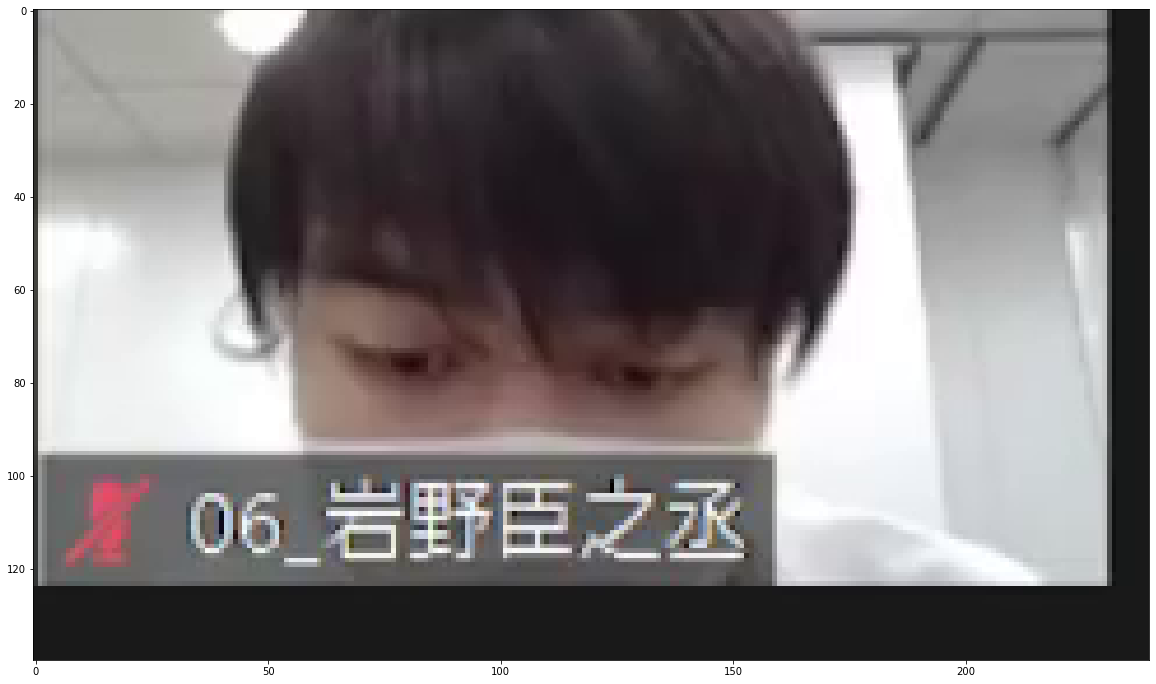

In [75]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands

face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.3, min_tracking_confidence=0.5)
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

dot3 = canny.copy()

for i in range(5):
    x0 = x.min() + (i * width) 
    x1 = x.min() + ((i+1) * width)
    for j in range(5):
        y1 = y.min() + (j * height)
        y2 = y.min() + ((j+1) * height)

        dot3 = cv2.circle(dot3, (x0, y1), 10, (255, 0, 0), -1)
        dot3 = cv2.circle(dot3, (x0, y2), 10, (255, 0, 0), -1)
        dot3 = cv2.circle(dot3, (x1, y1), 10, (255, 0, 0), -1)
        dot3 = cv2.circle(dot3, (x1, y2), 10, (255, 0, 0), -1)

        cropped = img[y1:y2, x0:x1]

        c_img = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
        c_img.flags.writeable = False
        results = face_mesh.process(c_img)
        c_img.flags.writeable = True


        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=c_img,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())

        plt.imshow(c_img)
        plt.savefig(f"{i}_{j}.png")